In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

In [2]:
import fpcore
import lambdas

import matplotlib.pyplot as plt

from interval import Interval
from lambdas import *
from plot_lambda import plot_lambda
from compare_plot_lambda import compare_plot_lambda
from time_lambda import time_lambda

In [3]:
from fpcore.interface import *
x = var("x")
dom = Interval("(- (/ PI 2))", "(/ PI 2)")
samples = 1 << 17
iters = 100

In [4]:
add_horner_sin = \
    Add(
        x,
        Horner(
            MinimaxPolynomial(
                make_function([x], sin(x) - x),
                dom,
                11
            )))
# time_lambda(dom, add_horner_sin, "fix first coefficient Horner", samples, iters)

In [5]:
add_estrin_sin = \
    Add(
        x,
        Estrin(
            MinimaxPolynomial(
                make_function([x], sin(x) - x),
                dom,
                11
            )))
# time_lambda(dom, add_estrin_sin, "fix first coefficient Horner", samples, iters)

2023-06-23 19:15:01.278563 add: type_check: In function: (FPCore (x)  (- (sin x) x))
2023-06-23 19:15:01.386798 add: type_check: Out function: (FPCore  (x)  (sin x))
2023-06-23 19:15:05.648661 add: type_check: In function: (FPCore (x)  (- (sin x) x))
2023-06-23 19:15:05.753498 add: type_check: Out function: (FPCore  (x)  (sin x))
[7.23907470703125, 7.322845458984375]


<BarContainer object of 2 artists>

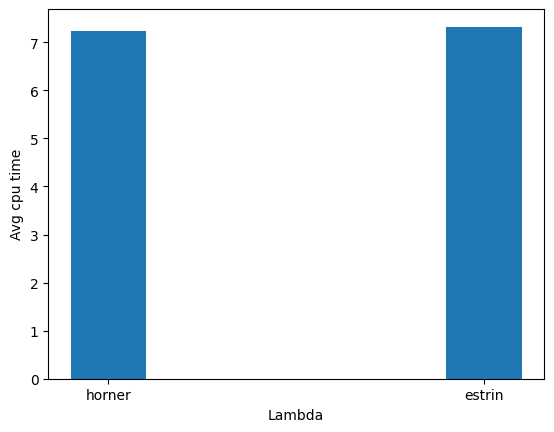

In [6]:
lambdas = ["horner", "estrin"]
times = [time_lambda(dom, add_horner_sin, "fix first coefficient Horner", samples, iters), time_lambda(dom, add_estrin_sin, "fix first coefficient Horner", samples, iters)]

print(times)

fig, ax = plt.subplots()

# tick_positions = [i/10 for i in range(int(max(times)*10)+2)]
# ax.set_yticks(tick_positions)
# ax.set_yticklabels(tick_positions)
# ax.margins(x=0)
ax.set_ylabel("Avg cpu time")
ax.set_xlabel("Lambda")
ax.bar(lambdas, times, width=0.2)
